In [1]:
# project: p8
# submitter-netid: hpan56
# partner-netid: ncai5
import csv
import copy
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#Stage 1
def get_mapping(path):
    file = open(path)
    data = list(csv.reader(file))
    dict_map = {}
    for i in data:
        dict_map[i[0]] = i[1]
    return dict_map

In [3]:
#q1
data = get_mapping("small_mapping.csv")
data

{'nm0000131': 'John Cusack',
 'nm0000154': 'Mel Gibson',
 'nm0000163': 'Dustin Hoffman',
 'nm0000418': 'Danny Glover',
 'nm0000432': 'Gene Hackman',
 'nm0000997': 'Gary Busey',
 'nm0001149': 'Richard Donner',
 'nm0001219': 'Gary Fleder',
 'nm0752751': 'Mitchell Ryan',
 'tt0313542': 'Runaway Jury',
 'tt0093409': 'Lethal Weapon'}

In [4]:
#q2
data["tt0313542"]

'Runaway Jury'

In [5]:
#q3
begin_tt = []
for keys in data:
    if keys[0:2] == 'tt':
        begin_tt.append(data[keys])
begin_tt

['Runaway Jury', 'Lethal Weapon']

In [6]:
#q4
fisrt_gary = []
for keys in data:
    if data[keys][0:5] == "Gary ":
        fisrt_gary.append(keys)
fisrt_gary

['nm0000997', 'nm0001219']

In [7]:
def get_raw_movies(path):
    file = open(path)
    data = list(csv.reader(file))
    list_movies = []
    count = 0
    keys = data[0]
    for i in data[1:]:
        dict_movies = {}
        for j in range(len(keys)):
            if keys[j] == 'year':
                dict_movies[keys[j]] = int(i[j])
            elif keys[j] == 'rating':
                dict_movies[keys[j]] = float(i[j])
            elif keys[j] == 'title':
                dict_movies[keys[j]] = i[j]
            else:
                dict_movies[keys[j]] = i[j].split(',')
        list_movies.append(dict_movies)
    return list_movies

In [8]:
#q5
get_raw_movies('small_movies.csv')

[{'title': 'tt0313542',
  'year': 2003,
  'rating': 7.1,
  'directors': ['nm0001219'],
  'actors': ['nm0000131', 'nm0000432', 'nm0000163'],
  'genres': ['Crime', 'Drama', 'Thriller']},
 {'title': 'tt0093409',
  'year': 1987,
  'rating': 7.6,
  'directors': ['nm0001149'],
  'actors': ['nm0000154', 'nm0000418', 'nm0000997', 'nm0752751'],
  'genres': ['Action', 'Crime', 'Thriller']}]

In [9]:
#q6
dict_q6 = get_raw_movies('small_movies.csv')
len(dict_q6[0]['genres'])

3

In [10]:
#q7
dict_q6[1]['actors'][-1]

'nm0752751'

In [11]:
def get_movies(movies_path, mapping_path):
    movies = get_raw_movies(movies_path)
    mapping = get_mapping(mapping_path)
    for i in movies:
        i['title'] = mapping.get(i['title'])
        for j in range(len(i['directors'])):
            i['directors'][j] = mapping.get(i['directors'][j])
        for j in range(len(i['actors'])):
            i['actors'][j] = mapping.get(i['actors'][j])
    return movies

In [12]:
small = get_movies("small_movies.csv", "small_mapping.csv")

In [13]:
#q8
small[0]["title"]

'Runaway Jury'

In [14]:
#q9
small[1]["directors"]

['Richard Donner']

In [15]:
#q10
small[-1]["actors"]

['Mel Gibson', 'Danny Glover', 'Gary Busey', 'Mitchell Ryan']

In [16]:
#q11
small

[{'title': 'Runaway Jury',
  'year': 2003,
  'rating': 7.1,
  'directors': ['Gary Fleder'],
  'actors': ['John Cusack', 'Gene Hackman', 'Dustin Hoffman'],
  'genres': ['Crime', 'Drama', 'Thriller']},
 {'title': 'Lethal Weapon',
  'year': 1987,
  'rating': 7.6,
  'directors': ['Richard Donner'],
  'actors': ['Mel Gibson', 'Danny Glover', 'Gary Busey', 'Mitchell Ryan'],
  'genres': ['Action', 'Crime', 'Thriller']}]

In [17]:
movies = get_movies("movies.csv", "mapping.csv")

In [18]:
#q12
movies[0:3]

[{'title': 'The Big Wedding',
  'year': 2013,
  'rating': 5.6,
  'directors': ['Justin Zackham'],
  'actors': ['Robert De Niro'],
  'genres': ['Comedy', 'Drama', 'Romance']},
 {'title': 'The Affair of the Necklace',
  'year': 2001,
  'rating': 6.1,
  'directors': ['Charles Shyer'],
  'actors': ['Simon Baker', 'Jonathan Pryce', 'Adrien Brody'],
  'genres': ['Drama', 'History', 'Romance']},
 {'title': 'The Barefoot Executive',
  'year': 1971,
  'rating': 6.0,
  'directors': ['Robert Butler'],
  'actors': ['Kurt Russell', 'Joe Flynn', 'Harry Morgan', 'Wally Cox'],
  'genres': ['Comedy', 'Family']}]

In [19]:
#q13
movies[-3:]

[{'title': 'Fortitude and Glory: Angelo Dundee and His Fighters',
  'year': 2012,
  'rating': 7.2,
  'directors': ['Chris Tasara'],
  'actors': ['Angelo Dundee', 'George Foreman', 'Freddie Roach'],
  'genres': ['Sport']},
 {'title': 'Ivanhoe',
  'year': 1952,
  'rating': 6.8,
  'directors': ['Richard Thorpe'],
  'actors': ['Robert Taylor', 'George Sanders'],
  'genres': ['Adventure', 'Drama', 'History']},
 {'title': 'The Great Gatsby',
  'year': 1949,
  'rating': 6.6,
  'directors': ['Elliott Nugent'],
  'actors': ['Alan Ladd', 'Macdonald Carey'],
  'genres': ['Drama']}]

In [20]:
def filter_movies_by_year(movies, year):
    i = 0
    while i < len(movies):
        if movies[i]["year"] != year:
            movies.pop(i)
        else:
            i += 1
    return movies

In [21]:
#q14
filter_movies_by_year(movies.copy(), 1930)

[{'title': 'Hook Line and Sinker',
  'year': 1930,
  'rating': 6.4,
  'directors': ['Edward F. Cline'],
  'actors': ['Bert Wheeler', 'Robert Woolsey', 'Ralf Harolde'],
  'genres': ['Comedy', 'Romance']},
 {'title': 'The Big Trail',
  'year': 1930,
  'rating': 7.2,
  'directors': ['Raoul Walsh', 'Louis R. Loeffler'],
  'actors': ['John Wayne', 'El Brendel', 'Tully Marshall'],
  'genres': ['Adventure', 'Romance', 'Western']}]

In [22]:
#q15
filter_movies_by_year(movies.copy(), 1931)

[{'title': 'Arizona',
  'year': 1931,
  'rating': 6.0,
  'directors': ['George B. Seitz'],
  'actors': ['John Wayne', 'Forrest Stanley'],
  'genres': ['Drama', 'Romance']},
 {'title': 'City Lights',
  'year': 1931,
  'rating': 8.5,
  'directors': ['Charles Chaplin'],
  'actors': ['Charles Chaplin', 'Harry Myers'],
  'genres': ['Comedy', 'Drama', 'Romance']},
 {'title': 'The Range Feud',
  'year': 1931,
  'rating': 5.8,
  'directors': ['D. Ross Lederman'],
  'actors': ['Buck Jones', 'John Wayne', 'Edward LeSaint'],
  'genres': ['Mystery', 'Western']}]

In [23]:
def counting(data, element):
    list_counting = []
    for i in data:
        for j in range(len(i[element])):
            if i[element][j] not in list_counting:
                list_counting.append(i[element][j])
    return list_counting

In [24]:
#q16
len(counting(movies, 'genres')) 

18

In [25]:
#q17
len(counting(movies, 'actors')) 

2605

In [26]:
#q18
len(counting(movies, 'directors')) 

1247

In [27]:
#q19
avg_rating = 0
for i in movies:
    avg_rating += i['rating']
avg_rating = avg_rating / len(movies)
avg_rating

6.401659528907912

In [28]:
#q20
longest_title = ''
for i in movies:
    if len(i['title']) > len(longest_title):
        longest_title = i['title']
longest_title

'Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb'

In [29]:
#Stage 2
def bucketize(movie_list, movie_key):
    bucket = {}
    for i in movie_list:
        if type(i[movie_key]) != list:
            for j in [i[movie_key]]:
                if j not in bucket:
                    bucket[j] = [i]
                else:
                    bucket[j].append(i)
        else:
            for j in i[movie_key]:
                if j not in bucket:
                    bucket[j] = [i]
                else:
                    bucket[j].append(i)
    return bucket

In [30]:
#q21
test_movies = [
{"title": "A", "year": 2018, "style": "short", "genres": ["g1"]},
{"title": "B", "year": 2018, "style": "long",  "genres": ["g2"]},
{"title": "C", "year": 2019, "style": "short", "genres": ["g3"]},
{"title": "D", "year": 2019, "style": "long", "genres": ["g1", "g2", "g3"]},
]
bucketize(test_movies, "year")

{2018: [{'title': 'A', 'year': 2018, 'style': 'short', 'genres': ['g1']},
  {'title': 'B', 'year': 2018, 'style': 'long', 'genres': ['g2']}],
 2019: [{'title': 'C', 'year': 2019, 'style': 'short', 'genres': ['g3']},
  {'title': 'D', 'year': 2019, 'style': 'long', 'genres': ['g1', 'g2', 'g3']}]}

In [31]:
#q22
bucketize(test_movies, "style")

{'short': [{'title': 'A', 'year': 2018, 'style': 'short', 'genres': ['g1']},
  {'title': 'C', 'year': 2019, 'style': 'short', 'genres': ['g3']}],
 'long': [{'title': 'B', 'year': 2018, 'style': 'long', 'genres': ['g2']},
  {'title': 'D', 'year': 2019, 'style': 'long', 'genres': ['g1', 'g2', 'g3']}]}

In [32]:
#q23
bucketize(test_movies, "genres")

{'g1': [{'title': 'A', 'year': 2018, 'style': 'short', 'genres': ['g1']},
  {'title': 'D', 'year': 2019, 'style': 'long', 'genres': ['g1', 'g2', 'g3']}],
 'g2': [{'title': 'B', 'year': 2018, 'style': 'long', 'genres': ['g2']},
  {'title': 'D', 'year': 2019, 'style': 'long', 'genres': ['g1', 'g2', 'g3']}],
 'g3': [{'title': 'C', 'year': 2019, 'style': 'short', 'genres': ['g3']},
  {'title': 'D', 'year': 2019, 'style': 'long', 'genres': ['g1', 'g2', 'g3']}]}

In [33]:
#q24
bucketize(small, "genres")

{'Crime': [{'title': 'Runaway Jury',
   'year': 2003,
   'rating': 7.1,
   'directors': ['Gary Fleder'],
   'actors': ['John Cusack', 'Gene Hackman', 'Dustin Hoffman'],
   'genres': ['Crime', 'Drama', 'Thriller']},
  {'title': 'Lethal Weapon',
   'year': 1987,
   'rating': 7.6,
   'directors': ['Richard Donner'],
   'actors': ['Mel Gibson', 'Danny Glover', 'Gary Busey', 'Mitchell Ryan'],
   'genres': ['Action', 'Crime', 'Thriller']}],
 'Drama': [{'title': 'Runaway Jury',
   'year': 2003,
   'rating': 7.1,
   'directors': ['Gary Fleder'],
   'actors': ['John Cusack', 'Gene Hackman', 'Dustin Hoffman'],
   'genres': ['Crime', 'Drama', 'Thriller']}],
 'Thriller': [{'title': 'Runaway Jury',
   'year': 2003,
   'rating': 7.1,
   'directors': ['Gary Fleder'],
   'actors': ['John Cusack', 'Gene Hackman', 'Dustin Hoffman'],
   'genres': ['Crime', 'Drama', 'Thriller']},
  {'title': 'Lethal Weapon',
   'year': 1987,
   'rating': 7.6,
   'directors': ['Richard Donner'],
   'actors': ['Mel Gibson',

In [34]:
#q25
len(bucketize(small, "actors"))

7

In [35]:
#q26
len(bucketize(movies, "genres"))

18

In [36]:
#q27
genres_movies = {}
bucket_genres = bucketize(movies, "genres")
for i in bucket_genres:
    genres_movies[i] = len(bucket_genres[i])
genres_movies

{'Comedy': 485,
 'Drama': 1094,
 'Romance': 352,
 'History': 73,
 'Family': 85,
 'Mystery': 121,
 'Thriller': 250,
 'Action': 299,
 'Crime': 357,
 'Adventure': 283,
 'Western': 226,
 'Music': 38,
 'Animation': 45,
 'Sport': 48,
 'Fantasy': 59,
 'War': 99,
 'Sci-Fi': 69,
 'Horror': 85}

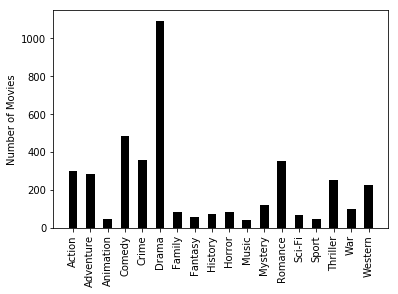

In [37]:
#q28
genres_list = sorted(genres_movies.keys())
num_list = []
for i in sorted(genres_movies.keys()): num_list.append(genres_movies[i])
plt.bar(range(len(num_list)), num_list, tick_label=genres_list, width =0.5, color = 'black')
plt.xticks(rotation=90)
plt.ylabel('Number of Movies')
plt.show()

In [38]:
genres_movies_B2000 = copy.deepcopy(bucket_genres)
genres_movies_IA2000 = copy.deepcopy(bucket_genres)
for i in bucket_genres:
    for j in bucket_genres[i]:
        if j['year'] < 2000:
            genres_movies_IA2000[i].remove(j)
        else:
            genres_movies_B2000[i].remove(j)
genres_movies_B2000n = {}
genres_movies_IA2000n = {}
for i in genres_movies_B2000:
    genres_movies_B2000n[i] = len(genres_movies_B2000[i])
for i in genres_movies_IA2000:
    genres_movies_IA2000n[i] = len(genres_movies_IA2000[i])

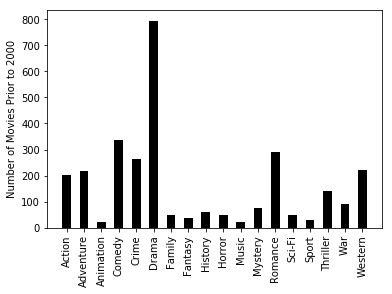

In [39]:
#q29
genres_list = sorted(genres_movies_B2000n.keys())
num_list = []
for i in sorted(genres_movies_B2000n.keys()): 
    num_list.append(genres_movies_B2000n[i])
plt.bar(range(len(num_list)), num_list, tick_label=genres_list, width =0.5, color = 'black')
plt.xticks(rotation=90)
plt.ylabel('Number of Movies Prior to 2000')
plt.show()

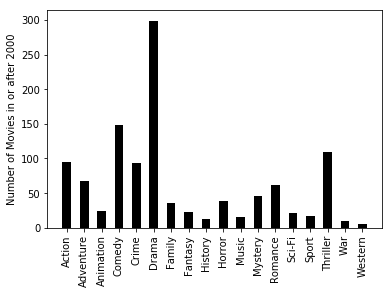

In [40]:
#q30
genres_list = sorted(genres_movies_IA2000n.keys())
num_list = []
for i in sorted(genres_movies_IA2000n.keys()): 
    num_list.append(genres_movies_IA2000n[i])
plt.bar(range(len(num_list)), num_list, tick_label=genres_list, width =0.5, color = 'black')
plt.xticks(rotation=90)
plt.ylabel('Number of Movies in or after 2000')
plt.show()

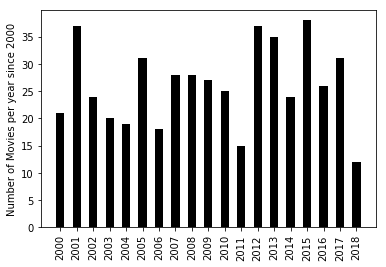

In [41]:
#q31
years_movies = bucketize(movies, "year")
years_list = sorted(years_movies.keys())[-19:]
num_list = []
for i in years_list:
    num_list.append(len(years_movies[i]))
plt.bar(range(len(num_list)), num_list, tick_label=years_list, width =0.5, color = 'black')
plt.xticks(rotation=90)
plt.ylabel('Number of Movies per year since 2000')
plt.show()

In [42]:
#q32
directors_movies = bucketize(movies, "directors")
direc_year = {}
for i in directors_movies:
    years = []
    for j in directors_movies[i]:
        years.append(j['year'])
    direc_year[i] = max(years) - min(years)
direc_year_30 = {}
for i in direc_year:
    if direc_year[i] > 29:
        direc_year_30[i] = direc_year[i]
direc_year_30

{'Howard Hawks': 42,
 'Charles Chaplin': 34,
 'Henry Hathaway': 36,
 'Stanley Kubrick': 46,
 'Taylor Hackford': 32,
 'Cecil B. DeMille': 30,
 'Lee H. Katzin': 30,
 'Richard Fleischer': 32,
 'Sidney Lumet': 33,
 'George Sherman': 33,
 'John Huston': 30,
 'Robert Siodmak': 30,
 'Eldar Ryazanov': 31,
 'Martin Ritt': 32}

In [43]:
#q33
actors_movies = bucketize(movies, "actors")
act_year = {}
for i in actors_movies:
    years = []
    for j in actors_movies[i]:
        years.append(j['year'])
    act_year[i] = max(years) - min(years)
act_year_40 = {}
for i in act_year:
    if act_year[i] > 39:
        act_year_40[i] = act_year[i]
act_year_40

{'Robert De Niro': 49,
 'Kurt Russell': 50,
 'John Wayne': 46,
 'Mickey Rooney': 75,
 'Robert Mitchum': 51,
 'Henry Fonda': 46,
 'Glenn Ford': 52,
 'Jeff Bridges': 48,
 'James Caan': 52,
 'Anthony Quinn': 61,
 'Dennis Quaid': 40,
 'Marlon Brando': 49,
 'Armand Assante': 40,
 'Eddie Albert': 41,
 'Jon Voight': 44,
 'Tony Curtis': 45,
 'Michael Constantine': 42,
 'Ernest Borgnine': 47,
 'Rod Steiger': 45,
 'George Burns': 60,
 'Bruce Dern': 45,
 'Fredric March': 41,
 'Lloyd Bridges': 44,
 'Robert Redford': 44,
 'Dean Stockwell': 53}

In [44]:
#q34
def row_ranking(row):
    return row["span"]

def top_n_span(buckets, n):
    spans = buckets
    rows = []
    for name in spans:
        span = buckets[name]
        rows.append({"name": name, "span": span})
    rows.sort(key=row_ranking, reverse=True)
    return rows[0:n]
top_n_span(direc_year, 10)

[{'name': 'Stanley Kubrick', 'span': 46},
 {'name': 'Howard Hawks', 'span': 42},
 {'name': 'Henry Hathaway', 'span': 36},
 {'name': 'Charles Chaplin', 'span': 34},
 {'name': 'Sidney Lumet', 'span': 33},
 {'name': 'George Sherman', 'span': 33},
 {'name': 'Taylor Hackford', 'span': 32},
 {'name': 'Richard Fleischer', 'span': 32},
 {'name': 'Martin Ritt', 'span': 32},
 {'name': 'Eldar Ryazanov', 'span': 31}]

In [45]:
#q35
top_n_span(act_year, 10)

[{'name': 'Mickey Rooney', 'span': 75},
 {'name': 'Anthony Quinn', 'span': 61},
 {'name': 'George Burns', 'span': 60},
 {'name': 'Dean Stockwell', 'span': 53},
 {'name': 'Glenn Ford', 'span': 52},
 {'name': 'James Caan', 'span': 52},
 {'name': 'Robert Mitchum', 'span': 51},
 {'name': 'Kurt Russell', 'span': 50},
 {'name': 'Robert De Niro', 'span': 49},
 {'name': 'Marlon Brando', 'span': 49}]

In [46]:
#q36
def row_rating_ranking(row):
    return row["rating"]

def top_n_rating(buckets, n, min_movies = 1):
    median_rating = []
    for i in buckets:
        rating = []
        for j in buckets[i]:
            rating.append(j['rating'])
        median = np.median(rating)
        return_dict = {'category': i, 'rating': median, 'count': len(buckets[i])}
        median_rating.append(return_dict)
    i = 0
    while i < len(median_rating):
        if median_rating[i]['count'] < min_movies:
            median_rating.pop(i)
        else:
            i += 1
    median_rating.sort(key=row_rating_ranking, reverse=True)
    return median_rating[0:n]
top_n_rating(bucket_genres, 3)

[{'category': 'Animation', 'rating': 7.3, 'count': 45},
 {'category': 'History', 'rating': 6.7, 'count': 73},
 {'category': 'War', 'rating': 6.7, 'count': 99}]

In [47]:
#q37
top_n_rating(bucketize(movies, 'year'), 10)

[{'category': 1921, 'rating': 8.3, 'count': 1},
 {'category': 1925, 'rating': 8.2, 'count': 1},
 {'category': 1919, 'rating': 7.5, 'count': 1},
 {'category': 1923, 'rating': 7.3, 'count': 2},
 {'category': 1962, 'rating': 7.2, 'count': 17},
 {'category': 1964, 'rating': 7.1, 'count': 19},
 {'category': 1957, 'rating': 7.0, 'count': 24},
 {'category': 1985, 'rating': 7.0, 'count': 17},
 {'category': 1976, 'rating': 7.0, 'count': 17},
 {'category': 1963, 'rating': 6.95, 'count': 10}]

In [48]:
#q38
top_n_rating(bucketize(movies, 'year'), n = 5, min_movies = 10)

[{'category': 1962, 'rating': 7.2, 'count': 17},
 {'category': 1964, 'rating': 7.1, 'count': 19},
 {'category': 1957, 'rating': 7.0, 'count': 24},
 {'category': 1985, 'rating': 7.0, 'count': 17},
 {'category': 1976, 'rating': 7.0, 'count': 17}]

In [49]:
#q39
top_n_rating(directors_movies, n = 6, min_movies = 3)

[{'category': 'Christopher Nolan', 'rating': 8.5, 'count': 9},
 {'category': 'Leonid Gayday', 'rating': 8.4, 'count': 5},
 {'category': 'Stanley Kubrick', 'rating': 8.3, 'count': 11},
 {'category': 'Sergio Leone', 'rating': 8.3, 'count': 7},
 {'category': 'Satyajit Ray', 'rating': 8.2, 'count': 9},
 {'category': 'Andrew Grieve', 'rating': 8.2, 'count': 6}]

In [50]:
#q40
top_n_rating(actors_movies, n = 3, min_movies = 5)

[{'category': 'Henry Bergman', 'rating': 8.2, 'count': 5},
 {'category': 'Ioan Gruffudd', 'rating': 8.2, 'count': 6},
 {'category': 'Robert Lindsay', 'rating': 8.2, 'count': 6}]